In [1]:
from definitions import ROOT_DIR
from plot.plot_regret import plot_performance
from config import *
from agent.agents import *
from agent.switching_agents import *
from experiments.experiments import *
import pickle

with open(f'{ROOT_DIR}/outputs/eval_set', 'rb') as file:
    eval_set = pickle.load(file)
with open(f'{ROOT_DIR}/outputs/eval_set_scX', 'rb') as file:
    eval_set_scX = pickle.load(file)
with open(f'{ROOT_DIR}/outputs/eval_set_scSm', 'rb') as file:
    eval_set_scSm = pickle.load(file)

with open(f'{ROOT_DIR}/outputs/eval_set_scFr0.5', 'rb') as file:
    eval_set_scFr = pickle.load(file)

with open(f'{ROOT_DIR}/outputs/eval_set_scFr0.4', 'rb') as file:
    eval_set_scFr4 = pickle.load(file)

with open(f'{ROOT_DIR}/outputs/eval_set_scGen', 'rb') as file:
    eval_set_scGen = pickle.load(file)

## Performance plots

Setting 1:
*   Machine cost 0.2
*   Machine state perfect
*   Human greedy w.r.t true next cell cost estimation
*   Human picks action at random with probability p = 0.2

Setting 2:
*   Machine cost 0.0
*   Machine ignores grass (grass --> road for machine)
*   Human greedy w.r.t true next cell cost estimation
*   Human picks action at random with probability p = 0.2
*   Human ignores car with probability p = 0.5


** Human policy approximation method: **
*   π_H(a|s) ~ n_times_a_picked_in_s / n_times_s_visited

* Problem * 
*   State with 6 from rows is rarely revisited
*   Trimmed states towards the end of the grid are visited more often
*   Machine picked mostly towards grid end
*   Offline not as expected 

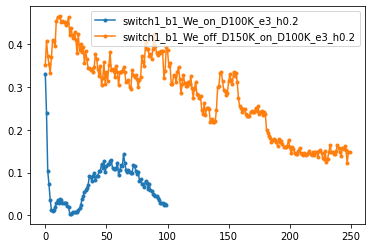

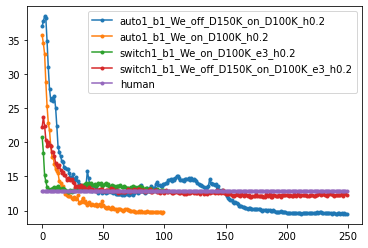

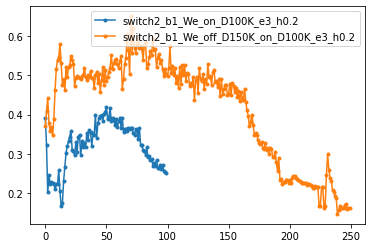

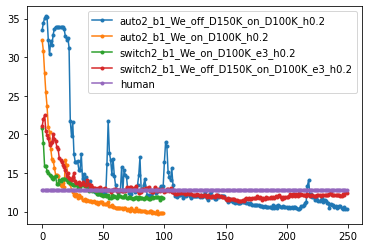

In [7]:
for setting in [1,2]:    
    with open(f'{ROOT_DIR}/outputs/trajectories/human{setting}_0.2_{switching_noise}_{init_traffic_level}_trajectories_150000_agent_pureState', 'rb') as file:
        human = pickle.load(file)
        root_dir = f'{ROOT_DIR}/results/'
        agents = [f'auto{setting}_b1_We_off_D150K_on_D100K_h0.2',\
                  f'auto{setting}_b1_We_on_D100K_h0.2',\
                  f'switch{setting}_b1_We_on_D100K_e3_h0.2',\
                  f'switch{setting}_b1_We_off_D150K_on_D100K_e3_h0.2']
        df = plot_performance(root_dir,eval_set, agents, human=human)

In [74]:
cnt = 0
freq = np.array(list(human.policy_approximation.values())).flatten()
cnt = len(list(filter(lambda x : x>1, freq)))
    
print(f'{cnt/freq.size}')

0.014447182700066083


In [6]:
# 1 rollout
with open(f'{ROOT_DIR}/outputs/trajectories/human2_0.2_{switching_noise}_{init_traffic_level}_trajectories_150000_agent_pureState', 'rb') as file:
        human = pickle.load(file)
# 10 rollouts
with open(f'{ROOT_DIR}/outputs/trajectories/humanloc2_0.2_{switching_noise}_{init_traffic_level}_trajectories_10000_agent_pureState', 'rb') as file:
        human_roll = pickle.load(file)
# 30 rollouts     
with open(f'{ROOT_DIR}/outputs/trajectories/human2_0.2_{switching_noise}_{init_traffic_level}_trajectories_5000_agent_pureState', 'rb') as file:
        human_roll2 = pickle.load(file)
# 60 rollouts     
with open(f'{ROOT_DIR}/outputs/trajectories/human2_0.2_{switching_noise}_{init_traffic_level}_trajectories_2500_agent_pureState', 'rb') as file:
        human_roll3 = pickle.load(file)
# 100 rollouts     
with open(f'{ROOT_DIR}/outputs/trajectories/human2_0.2_{switching_noise}_{init_traffic_level}_trajectories_1500_agent_pureState', 'rb') as file:
        human_roll4 = pickle.load(file)
# 15 rollouts
with open(f'{ROOT_DIR}/outputs/trajectories/human2_0.2_{switching_noise}_{init_traffic_level}_trajectories_10000_agent_pureState', 'rb') as file:
        human_roll1 = pickle.load(file)

In [7]:
for hum in [human, human_roll, human_roll1, human_roll2,human_roll3, human_roll4]:
    cnt = 0
    freq = np.array(list(hum.policy_approximation.values())).flatten()
    freq0 = len(list(filter(lambda x : x==0, freq)))/freq.size
    freqge1 = len(list(filter(lambda x : x>1, freq)))/freq.size

    print(f'Relative frequences of values : zero {freq0:.3f},  > one {freqge1:.3f} ')

Relative frequences of values : zero 0.655,  > one 0.014 
Relative frequences of values : zero 0.432,  > one 0.331 
Relative frequences of values : zero 0.380,  > one 0.401 
Relative frequences of values : zero 0.288,  > one 0.513 
Relative frequences of values : zero 0.189,  > one 0.651 
Relative frequences of values : zero 0.126,  > one 0.756 


In [28]:
# fixed human
with open(f'{ROOT_DIR}/outputs/trajectories/human2_0.2_{switching_noise}_{init_traffic_level}_trajectories_40000_15_agent_pureState', 'rb') as file:
        human = pickle.load(file)
hum = human
cnt = 0
freq = np.array(list(hum.policy_approximation.values())).flatten()
freq0 = len(list(filter(lambda x : x==0, freq)))/freq.size
freqge1 = len(list(filter(lambda x : x>1, freq)))/freq.size

print(f'Relative frequences of values : zero {freq0:.3f},  > one {freqge1:.3f} ')

Relative frequences of values : zero 0.394,  > one 0.430 


Instead of gathering trajectories from 150K different grids. only 10K unique grids are produced and 15 different trajectories are gathered form each grid. 

**Human policy approximation method**

*   human policy distribution is computed per grid

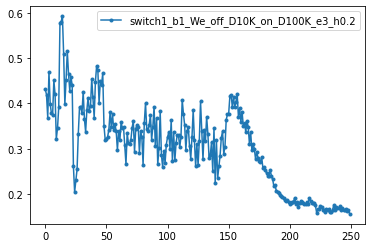

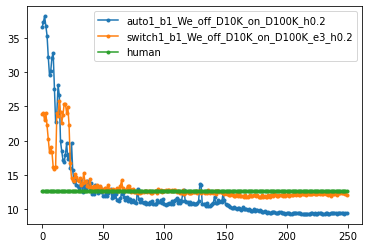

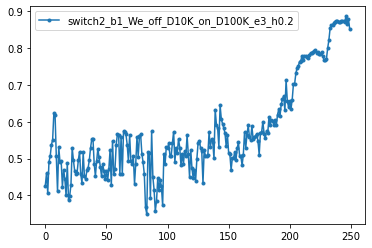

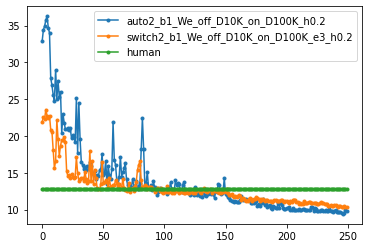

In [6]:
for setting in [1,2]:    
    with open(f'{ROOT_DIR}/outputs/trajectories/human{setting}_0.2_{switching_noise}_{init_traffic_level}_trajectories_10000_agent_pureState', 'rb') as file:
        human = pickle.load(file)
        root_dir = f'{ROOT_DIR}/results/'
        agents = [f'auto{setting}_b1_We_off_D10K_on_D100K_h0.2', 
                  f'switch{setting}_b1_We_off_D10K_on_D100K_e3_h0.2']
        df = plot_performance(root_dir,eval_set, agents, human=human)

**100 rollouts 1.5K unique trajectories**

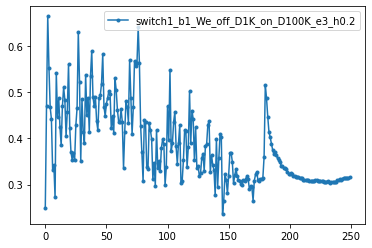

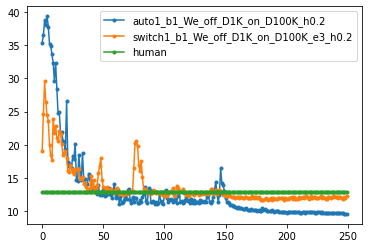

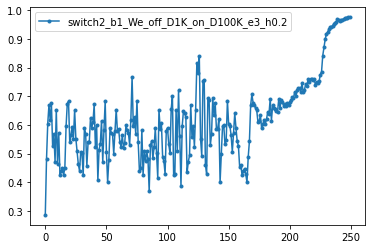

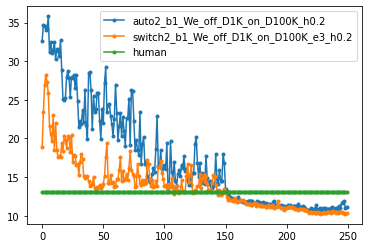

In [2]:
for setting in [1,2]:    
    with open(f'{ROOT_DIR}/outputs/trajectories/human{setting}_0.2_{switching_noise}_{init_traffic_level}_trajectories_1500_agent_pureState', 'rb') as file:
        human = pickle.load(file)
        root_dir = f'{ROOT_DIR}/results/'
        agents = [f'auto{setting}_b1_We_off_D1K_on_D100K_h0.2', 
                  f'switch{setting}_b1_We_off_D1K_on_D100K_e3_h0.2']
        df = plot_performance(root_dir,eval_set, agents, human=human)

**40K unique trajectories, 15 rollouts**

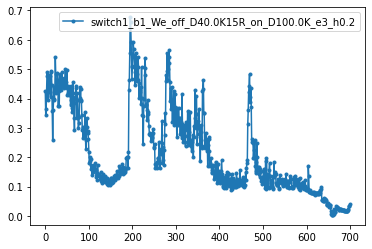

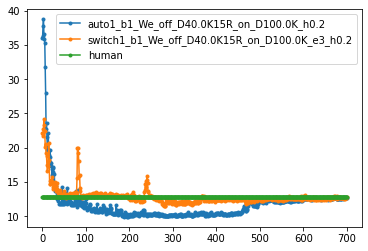

In [17]:
setting = 1
n_traj = 40000
n_episodes = 100000
with open(f'{ROOT_DIR}/outputs/trajectories/human{setting}_0.2_{switching_noise}_{init_traffic_level}_trajectories_{n_traj}_15_agent_pureState', 'rb') as file:
    human = pickle.load(file)
    root_dir = f'{ROOT_DIR}/results/'
    agents = [f'auto{setting}_b1_We_off_D{n_traj/1000}K15R_on_D{n_episodes/1000}K_h0.2', 
                f'switch{setting}_b1_We_off_D{n_traj/1000}K15R_on_D{n_episodes/1000}K_e3_h0.2']
    df = plot_performance(root_dir,eval_set, agents, human=human)

Qualitative plots

In [6]:

root_dir = ROOT_DIR+'/results'
estimation_noise = 0.2
switching_noise = 0.0
nk_traj = 1
sett = 2
dir = root_dir+f'/switch{sett}_b1_We_off_D{nk_traj}K_on_D100K_e3_h{estimation_noise}'

with open(f'{ROOT_DIR}/outputs/trajectories/human{sett}_{estimation_noise}_{switching_noise}_{init_traffic_level}_trajectories_{nk_traj}500_agent_pureState', 'rb') as file:
    human = pickle.load(file)
with open(f'{dir}/switching_agent_on', 'rb') as file:
    switch_full = pickle.load(file)
with open(f'{dir}/actor_agent_on', 'rb') as file:
    switch_machine = pickle.load(file)

human_only = FixedSwitchingHuman()
cost_difference = [ OptimalAgent(grid, switch_machine.control_cost).eval() - evaluate(human_only, [human], [grid], 1 )[0] for grid in eval_set]

In [27]:
cost_difference = np.array(cost_difference)
ind = np.argsort(cost_difference)[:10]
grids_to_plot = np.array(eval_set)[ind]

In [8]:
from plot.plot_path import *
import os 
root_plot_dir = f'{root_dir}/grid_plots'
if not os.path.exists(root_plot_dir):
    os.mkdir(root_plot_dir)
plot_dir = f'{root_plot_dir}/{dir.split("/")[-1]}' 
if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)

for i,grid in enumerate(grids_to_plot):
    plt_path = PlotPath(grid, n_try=1)
    cost = grid.plot_trajectory(switch_full, [human, switch_machine], plt_path, show_cf=False)
    plt_path.plot(f'{plot_dir}/grid_{i}.png')

Setting 1:
Human picks at random with p = 0.2
*   π(a|s) = 0.8 \* (1 / n_opt) + 0.2\*(1/n_cell) if a==a_opt
*   π(a|s) =  0.2\*(1/n_cell) if a!=a_opt

Setting 2:
Human picks at random with p = 0.2 and ignores car with p_ignore = 0.5
*   a == a_opt
    *   next_cell == 'road': π(a|s) = 0.5 \* 0.8 / n_road + 0.5 \* 0.8 / (n_road + n_car) + 0.2 \* n_cell
    *   next_cell == 'car': π(a|s) = 0.8 / n_car + 0.2 / n_cell
    *   next_cell not in {'road', 'car'} and 'car' in row : π(a|s) = 0.5 \* 0.8 
    \* (1 / n_opt) + 0.2\*(1/n_cell)
    *   next_cell not in {'road', 'car'} and 'car' not in row : π(a|s) = 0.8 
    \* (1 / n_opt) + 0.2\*(1/n_cell)
*   a != a_opt
    *   next_cell == 'car': π(a|s) = 0.5 \* 0.8 / (n_road + n_car) + 0.2 / n_cell
    *   next_cell != 'car': π(a|s) = 0.2 / n_cell

               

**Experiments with actual human distribution**

Wrong human never chooses wall, machine does some times (Coverage assumption violated)

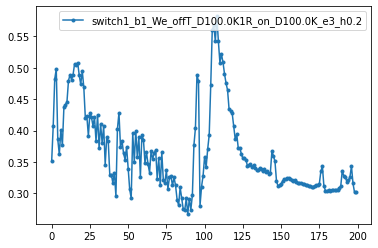

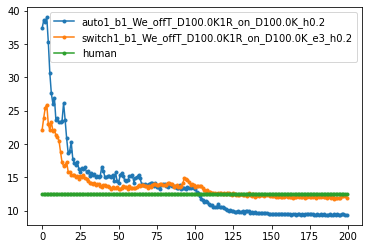

In [2]:
setting = 1
n_traj = 100000
n_episodes = 100000
with open(f'{ROOT_DIR}/outputs/trajectories/humaN{setting}_0.2_{switching_noise}_{init_traffic_level}_trajectories_{n_traj}_1_agent_pureState', 'rb') as file:
    human = pickle.load(file)
    root_dir = f'{ROOT_DIR}/results/'
    agents = [f'auto{setting}_b1_We_offT_D{n_traj/1000}K1R_on_D{n_episodes/1000}K_h0.2', 
                f'switch{setting}_b1_We_offT_D{n_traj/1000}K1R_on_D{n_episodes/1000}K_e3_h0.2']
    df = plot_performance(root_dir,eval_set, agents, human=human)

Correct: machine and human never choose action that leads to wall

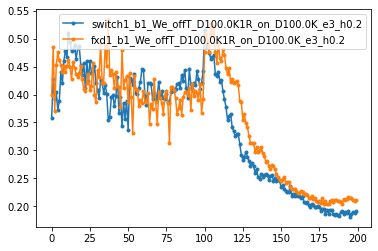

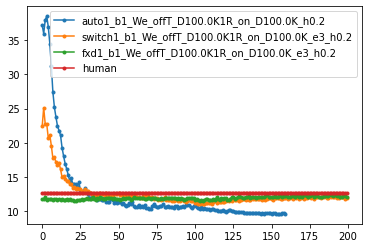

In [6]:
setting = 1
n_traj = 100000
n_episodes = 100000
with open(f'{ROOT_DIR}/outputs/trajectories/human{setting}_0.2_{switching_noise}_{init_traffic_level}_trajectories_{n_traj}_1_agent_pureState', 'rb') as file:
    human = pickle.load(file)
    root_dir = f'{ROOT_DIR}/results/'
    agents = [f'auto{setting}_b1_We_offT_D{n_traj/1000}K1R_on_D{n_episodes/1000}K_h0.2', f'switch{setting}_b1_We_offT_D{n_traj/1000}K1R_on_D{n_episodes/1000}K_e3_h0.2',f'fxd{setting}_b1_We_offT_D{n_traj/1000}K1R_on_D{n_episodes/1000}K_e3_h0.2']                
    df = plot_performance(root_dir,eval_set, agents, human=human)

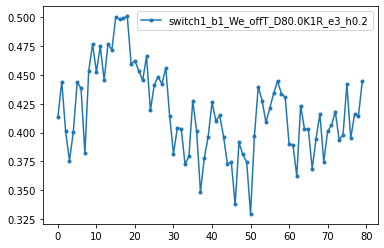

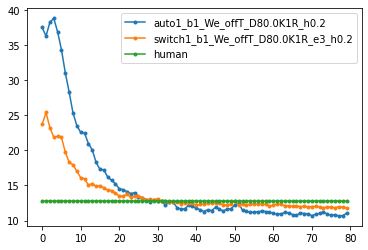

In [36]:
setting = 1
n_traj = 80000
n_episodes = 100000
with open(f'{ROOT_DIR}/outputs/trajectories/humaN{setting}_0.2_{switching_noise}_{init_traffic_level}_trajectories_{n_traj}_1_agent_pureState', 'rb') as file:
    human = pickle.load(file)
    root_dir = f'{ROOT_DIR}/results/'
    agents = [f'auto{setting}_b1_We_offT_D{n_traj/1000}K1R_h0.2', f'switch{setting}_b1_We_offT_D{n_traj/1000}K1R_e3_h0.2']                
    df = plot_performance(root_dir,eval_set, agents, human=human)

In [2]:
from experiments.utils import *
from agent.agents import *

test_grid = eval_set[5]
human_test = NoisyDriverAgent(env_generator, prob_wrong=0.2, setting=2 )
human_only = FixedSwitchingHuman()
traj = learn_evaluate(human_only, [human_test], [test_grid], is_learn=False, ret_trajectory=True, n_try=10000)
# plt_path = PlotPath(test_grid, n_try=1)
# plt_path.plot(f'{ROOT_DIR}/grid_test.png')


**Extreme scenario**

50% road/grass/stone
50% road/car/stone

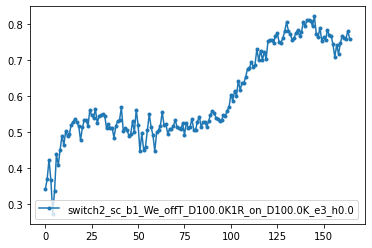

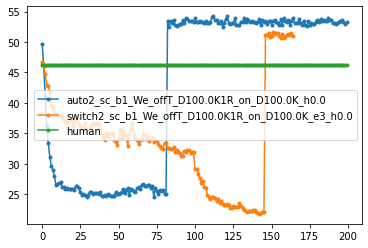

In [5]:
setting = 2
n_traj = 100000
n_episodes = 100000
with open(f'{ROOT_DIR}/outputs/trajectories/human{setting}_0.0_{switching_noise}_{init_traffic_level}_trajectories_{n_traj}_1_agent_pureState_sc', 'rb') as file:
    human = pickle.load(file)
    root_dir = f'{ROOT_DIR}/results/'
    agents = [f'auto{setting}_sc_b1_We_offT_D{n_traj/1000}K1R_on_D{n_episodes/1000}K_h0.0', f'switch{setting}_sc_b1_We_offT_D{n_traj/1000}K1R_on_D{n_episodes/1000}K_e3_h0.0']                
    df = plot_performance(root_dir,eval_set_sc, agents, human=human)

In [4]:
from agent.agents import OptimalAgent
optimal_cost = np.mean( [ OptimalAgent(grid, 0.0).eval() for grid in eval_set_scSm])
print(optimal_cost)

12.084


In [2]:
from agent.agents import OptimalAgent
eval_sets = {'Fr0.5': eval_set_scFr,  'Gen': eval_set_scGen}
optimal_cost = {k: np.mean( [ OptimalAgent(grid, 0.0).eval() for grid in eval_set]) for k,eval_set in eval_sets.items()}
print(optimal_cost)

{'Fr0.5': 14.062, 'Gen': 4.45}


In [2]:
human = NoisyDriverAgent(env_generator, prob_wrong=estimation_noise,p_ignore_car=p_ignore, setting=setting, noise_sw=switching_noise, c_H=c_H)

human_only = FixedSwitchingHuman()
evaluate(human_only, [human], eval_set_scGen)

(27.523400000000002, 0.0)

Extreme clean setting with some cases where greedy!=optimal are removed

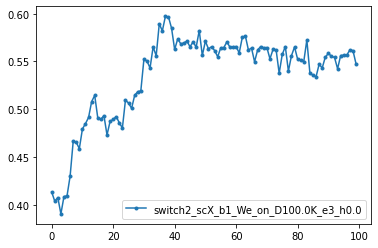

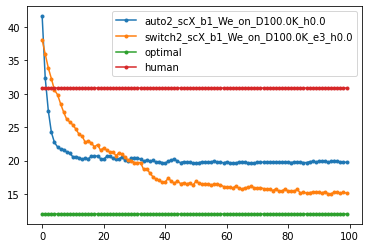

In [7]:
root_dir = f'{ROOT_DIR}/results/'
agents = [f'auto{setting}_scX_b1_We_on_D{n_episodes/1000}K_h0.0', f'switch{setting}_scX_b1_We_on_D{n_episodes/1000}K_e3_h0.0']                
df = plot_performance(root_dir,eval_set_scX, agents, human=human, optimal_c=optimal_cost)

Extreme clean setting 

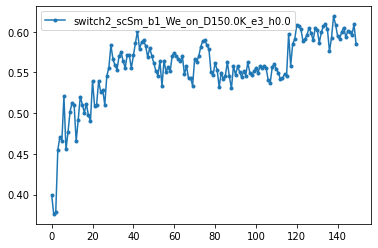

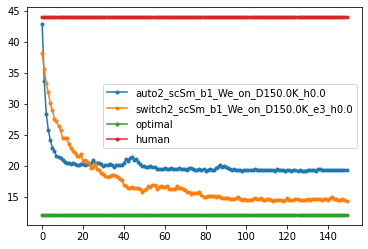

In [4]:
root_dir = f'{ROOT_DIR}/results/'
human = NoisyDriverAgent(env_generator, prob_wrong=estimation_noise, setting=setting, noise_sw=switching_noise, c_H=c_H)

agents = [f'auto{setting}_scSm_b1_We_on_D{n_episodes/1000}K_h0.0', f'switch{setting}_scSm_b1_We_on_D{n_episodes/1000}K_e3_h0.0']                
df = plot_performance(root_dir,eval_set_scSm, agents, human=human, optimal_c=optimal_cost)

V1 vs V4

In [34]:
root_dir = ROOT_DIR+'/results'

dir = root_dir+f'/switchV4{setting}_scSm_b1_We_on_D{n_episodes/1000}K_e3_h{estimation_noise}'
with open(f'{dir}/actor_agent_on', 'rb') as file:
    machine = pickle.load(file)
human = NoisyDriverAgent(env_generator, prob_wrong=estimation_noise,p_ignore_car=p_ignore, setting=setting, noise_sw=switching_noise, c_H=c_H)

machine.trainable=False

hard_switch = SwitchHardFixed()

hard_switch_cost = evaluate(hard_switch, [human, machine], eval_set_scSm, n_try=3)



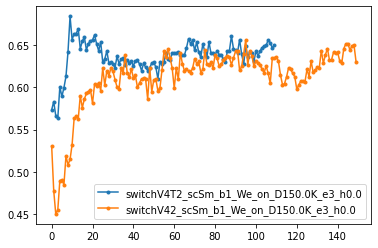

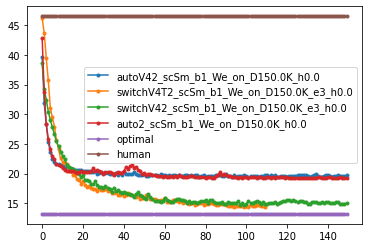

In [43]:
root_dir = f'{ROOT_DIR}/results/'
human = NoisyDriverAgent(env_generator, prob_wrong=estimation_noise, p_ignore_car= p_ignore,setting=setting, noise_sw=switching_noise, c_H=c_H)

agents = [f'autoV4{setting}_scSm_b1_We_on_D{n_episodes/1000}K_h0.0', \
          f'switchV4T{setting}_scSm_b1_We_on_D{n_episodes/1000}K_e3_h0.0',\
            f'switchV4{setting}_scSm_b1_We_on_D{n_episodes/1000}K_e3_h0.0',\
              f'auto{setting}_scSm_b1_We_on_D{n_episodes/1000}K_h0.0']
                #  f'switch{setting}_scSm_b1_We_on_D{n_episodes/1000}K_e3_h0.0']                
df = plot_performance(root_dir,eval_set_scSm, agents, human=human, optimal_c=hard_switch_cost[0])

In [41]:
hard_switch_cost


(13.180666666666665, 0.5250833333333332)

Clean setting with simplified features

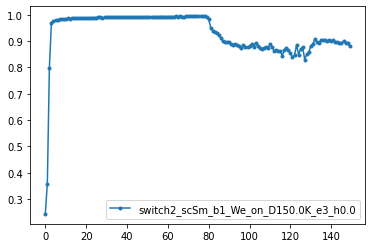

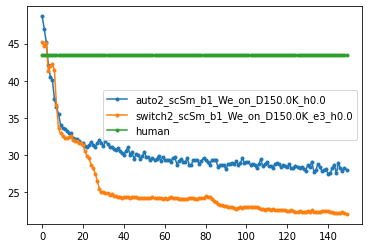

In [9]:
root_dir = f'{ROOT_DIR}/results/'
human = NoisyDriverAgent(env_generator, prob_wrong=estimation_noise, setting=setting, noise_sw=switching_noise, c_H=c_H)

agents = [f'auto{setting}_scSm_b1_We_on_D{n_episodes/1000}K_h0.0', f'switch{setting}_scSm_b1_We_on_D{n_episodes/1000}K_e3_h0.0']                
df = plot_performance(root_dir,eval_set_scSm, agents, human=human)

Clean setting with V2, V3 vs V1

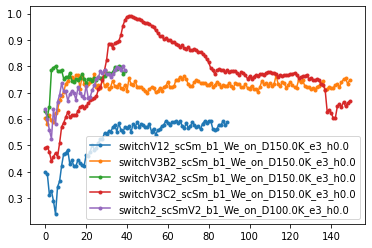

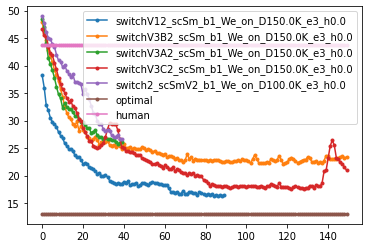

In [4]:
root_dir = f'{ROOT_DIR}/results/'
human = NoisyDriverAgent(env_generator, prob_wrong=estimation_noise, setting=setting, noise_sw=switching_noise, c_H=c_H)

agents = [f'switchV1{setting}_scSm_b1_We_on_D{n_episodes/1000}K_e3_h0.0', f'switchV3B{setting}_scSm_b1_We_on_D{n_episodes/1000}K_e3_h0.0',f'switchV3A{setting}_scSm_b1_We_on_D{n_episodes/1000}K_e3_h0.0',f'switchV3C{setting}_scSm_b1_We_on_D{n_episodes/1000}K_e3_h0.0', f'switch{setting}_scSmV2_b1_We_on_D{100000/1000}K_e3_h0.0', ]                
df = plot_performance(root_dir,eval_set_scSm, agents, human=human, optimal_c=13.02)

End-to-end experiment with V4 (row shift, wall padding, wall = 0 0 0 0)

In [24]:
human_only = FixedSwitchingHuman()
with open(f'{ROOT_DIR}/outputs/trajectories/human{setting}_0.0_{switching_noise}_{init_traffic_level}_trajectories_{n_traj}_1_agent_pureState_scSm', 'rb') as file:
    human = pickle.load(file)
human = NoisyDriverAgent(env_generator, prob_wrong=estimation_noise, setting=setting, noise_sw=switching_noise, c_H=c_H)

evaluate(human_only, [human], eval_set_scSm, n_try=3)

(30.59133333333333, 0.0)

In [27]:
human = NoisyDriverAgent(env_generator, prob_wrong=estimation_noise, setting=3,p_ignore_car=p_ignore, noise_sw=switching_noise, c_H=c_H)

evaluate(human_only, [human], eval_set_scGen, n_try=1)

(6.89, 0.0)

In [53]:
with open(f'{ROOT_DIR}/outputs/trajectories/human{setting}_0.0_{switching_noise}_{init_traffic_level}_trajectories_{n_traj}_1_agent_pureState_scSm', 'rb') as file:
    human = pickle.load(file)
    root_dir = f'{ROOT_DIR}/results/'
dir = root_dir+f'/autoV4{setting}_scSm_b1_We_offT_D{n_traj/1e+3}K1R_on_D{n_episodes/1e+3}K_h{estimation_noise}'
with open(f'{dir}/actor_agent_off', 'rb') as file:
    machine = pickle.load(file)
hard_switch = SwitchHardFixed()
hard_switch_cost = evaluate(hard_switch, [human, machine], eval_set_scSm, n_try=3)

eps_0 = 0.2-0.1, target update freq  5000, Full experiment for extremely simple setting, after bug fixing

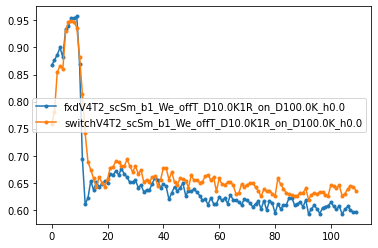

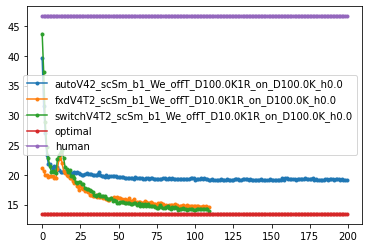

In [88]:
# human = NoisyDriverAgent(env_generator, prob_wrong=estimation_noise, setting=setting, noise_sw=switching_noise, c_H=c_H)

agents = [f'autoV4{setting}_scSm_b1_We_offT_D{n_traj/1e+3}K1R_on_D{n_episodes/1000}K_h0.0',\
          # f'switchV4{setting}_scSm_b1_We_offT_D{n_traj/1e+3}K1R_on_D{n_episodes/1e+3}K_e3_h0.0',
        #   f'fxdV4T{setting}_scSm_b1_We_offT_D{70e3/1e+3}K1R_on_D{n_episodes/1e+3}K_e3_h0.0',
        #   f'fxdV4T{setting}_scSm_b1_We_on_D{150e3/1e+3}K_e3_h0.0',
          f'fxdV4T{setting}_scSm_b1_We_offT_D{10e3/1e+3}K1R_on_D{n_episodes/1e+3}K_h0.0',
          f'switchV4T{setting}_scSm_b1_We_offT_D{10e3/1e+3}K1R_on_D{n_episodes/1e+3}K_h0.0']          
          # f'fxdV4{setting}_scSm_b1_We_offT_D{n_traj/1e+3}K1R_on_D{n_episodes/1e+3}K_e3_h0.0']                
df = plot_performance(root_dir,eval_set_scSm, agents, human=human, optimal_c=hard_switch_cost[0])

Setting in which each grid has half cells with only grass obstacles and only half only car 

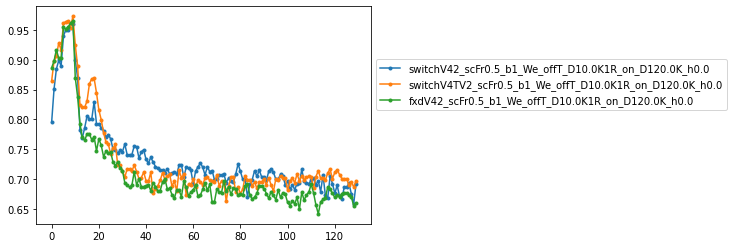

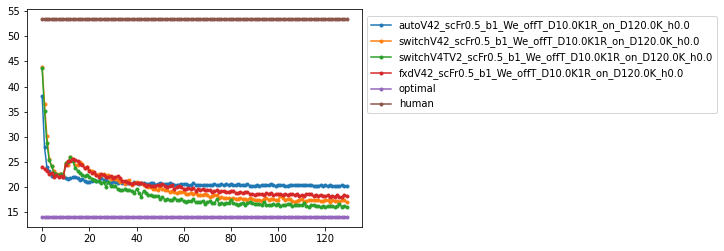

In [12]:
human = NoisyDriverAgent(env_generator, prob_wrong=estimation_noise, p_ignore_car=p_ignore,setting=setting, noise_sw=switching_noise, c_H=c_H)
root_dir = f'{ROOT_DIR}/results/'
agents = [f'autoV4{setting}_scFr0.5_b1_We_offT_D10.0K1R_on_D120.0K_h0.0',
          f'switchV4{setting}_scFr0.5_b1_We_offT_D10.0K1R_on_D120.0K_h0.0',
          f'switchV4TV{setting}_scFr0.5_b1_We_offT_D10.0K1R_on_D120.0K_h0.0',
        #   f'switchV4T1{setting}_scFr0.5_b1_We_offT_D10.0K1R_on_D120.0K_h0.0',
          # f'switchV4T{setting}_scFr0.5_b1_We_offT_D10.0K1R_on_D120.0K_h0.0',


          # f'fxdV4{setting}_scFr0.5_b1_We_offT_D10.0K1R_on_D120.0K_h0.0'
          ]
df = plot_performance(root_dir,eval_set_scFr, agents, human=human, optimal_c=optimal_cost['Fr0.5'])

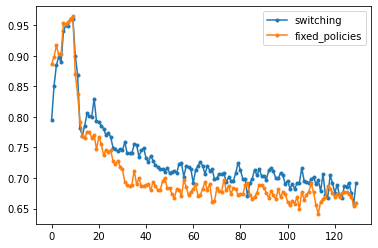

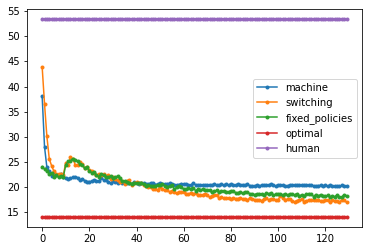

In [11]:
human = NoisyDriverAgent(env_generator, prob_wrong=estimation_noise, p_ignore_car=p_ignore,setting=2, noise_sw=switching_noise, c_H=c_H)
root_dir = f'{ROOT_DIR}/results/final'
agents = [f'autoV42_scFr0.5_b1_We_offT_D10.0K1R_on_D120.0K_h0.0',
          f'switchV42_scFr0.5_b1_We_offT_D10.0K1R_on_D120.0K_h0.0',
          f'fxdV42_scFr0.5_b1_We_offT_D10.0K1R_on_D120.0K_h0.0'
          ]
df = plot_performance(root_dir,eval_set_scFr, agents, human=human, optimal_c=optimal_cost['Fr0.5'])

full vs online + pretrained machine

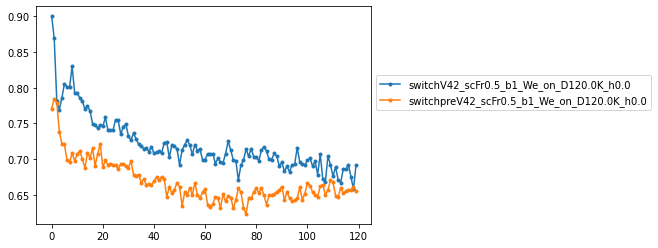

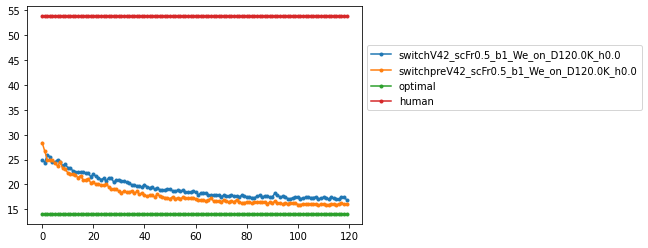

In [14]:
agents = [
          f'switchV4{setting}_scFr0.5_b1_We_on_D120.0K_h0.0',
          # f'switchV4T{setting}_scFr0.5_b1_We_on_D120.0K_h0.0',
          f'switchpreV4{setting}_scFr0.5_b1_We_on_D120.0K_h0.0',
        #   f'switchpreV4{setting}_scFr0.5_b1_We_offT_D10.0K1R_on_D120.0K_h0.0',         
          
          ]
df = plot_performance(root_dir,eval_set_scFr, agents, human=human, optimal_c=optimal_cost['Fr0.5'])

40% grass 60% car

In [2]:
from agent.agents import OptimalAgent
optimal_cost = np.mean( [ OptimalAgent(grid, 0.0).eval() for grid in eval_set_scFr4])

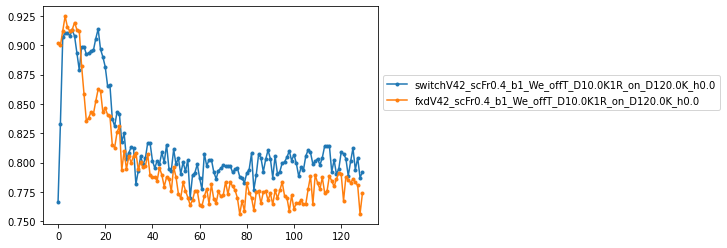

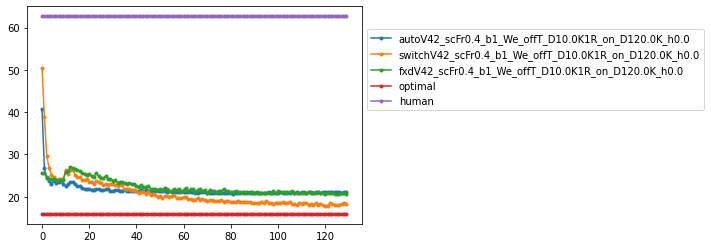

In [4]:
human = NoisyDriverAgent(env_generator, prob_wrong=estimation_noise, p_ignore_car = p_ignore, setting=setting, noise_sw=switching_noise, c_H=c_H)
root_dir = f'{ROOT_DIR}/results/'
agents = [f'autoV4{setting}_scFr0.4_b1_We_offT_D10.0K1R_on_D120.0K_h0.0',
          f'switchV4{setting}_scFr0.4_b1_We_offT_D10.0K1R_on_D120.0K_h0.0',
          f'fxdV4{setting}_scFr0.4_b1_We_offT_D10.0K1R_on_D120.0K_h0.0'
          ]
df = plot_performance(root_dir,eval_set_scFr4, agents, human=human, optimal_c=optimal_cost['Fr0.4'])

General setting

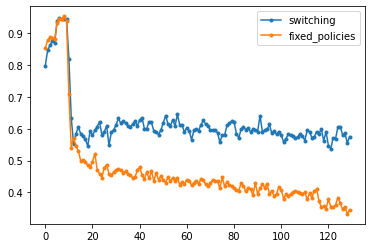

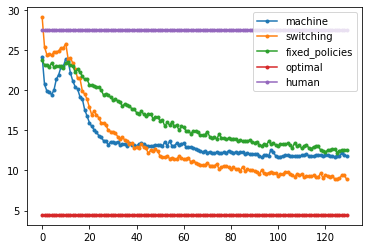

In [5]:
human = NoisyDriverAgent(env_generator, prob_wrong=estimation_noise, p_ignore_car = p_ignore, setting=2, noise_sw=switching_noise, c_H=c_H)
root_dir = f'{ROOT_DIR}/results/final'
agents = [f'autoV42_scGen_b1_We_offT_D10.0K1R_on_D120.0K_h0.0',
          f'switchV42_scGen_b1_We_offT_D10.0K1R_on_D120.0K_h0.0',
          f'fxdV42_scGen_b1_We_offT_D10.0K1R_on_D120.0K_h0.0'
          ]
df = plot_performance(root_dir,eval_set_scGen, agents, human=human, optimal_c=optimal_cost['Gen'])

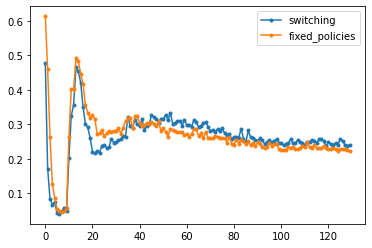

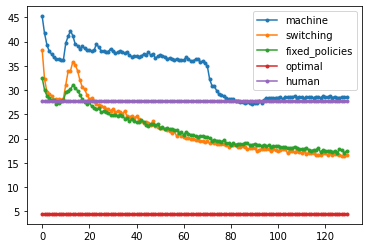

In [3]:
human = NoisyDriverAgent(env_generator, prob_wrong=estimation_noise, p_ignore_car = p_ignore, setting=3, noise_sw=switching_noise, c_H=c_H)
root_dir = f'{ROOT_DIR}/results/final'
agents = [f'autoV43_scGen_b1_We_offT_D10.0K1R_on_D120.0K_h0.0',
          f'switchV43_scGen_b1_We_offT_D10.0K1R_on_D120.0K_h0.0',
          f'fxdV43_scGen_b1_We_offT_D10.0K1R_on_D120.0K_h0.0'
          ]
df = plot_performance(root_dir,eval_set_scGen, agents, human=human, optimal_c=optimal_cost['Gen'])

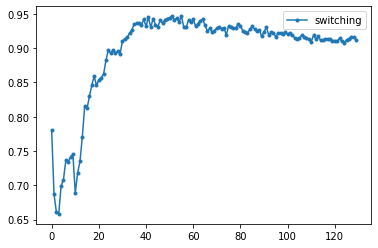

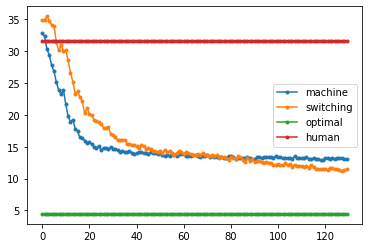

In [3]:
human = NoisyDriverAgent(env_generator, prob_wrong=estimation_noise, p_ignore_car = p_ignore, setting=7, noise_sw=switching_noise, c_H=c_H)
root_dir = f'{ROOT_DIR}/results/'
agents = [
    f'autoV47_scGen_b1_We_offT_D10.0K1R_on_D120.0K_h0.0',
          f'switchV47_scGen_b1_We_offT_D10.0K1R_on_D120.0K_h0.0',
          f'fxdV46_scGen_b1_We_offT_D10.0K1R_on_D120.0K_h0.0'
          ]
df = plot_performance(root_dir,eval_set_scGen, agents, human=human, optimal_c=optimal_cost['Gen'])

In [5]:
root_dir = ROOT_DIR+'/results'
estimation_noise = 0.0
switching_noise = 0.0
n_traj = 150000
sett = 7
dir = root_dir+f'/switchV4{sett}_scGen_b1_We_offT_D10.0K1R_on_D120.0K_h0.0'

# with open(f'{ROOT_DIR}/outputs/trajectories/human{sett}_{estimation_noise}_{switching_noise}_{init_traffic_level}_trajectories_{n_traj}_1_agent_pureState_sc', 'rb') as file:
#     human = pickle.load(file)
with open(f'{dir}/switching_agent_on', 'rb') as file:
    switch_full = pickle.load(file)
with open(f'{dir}/actor_agent_on', 'rb') as file:
    switch_machine = pickle.load(file)

In [6]:

from plot.plot_path import *
import os 
root_plot_dir = f'{root_dir}/grid_plots'
if not os.path.exists(root_plot_dir):
    os.mkdir(root_plot_dir)
plot_dir = f'{root_plot_dir}/{dir.split("/")[-1]}' 
if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)
human = NoisyDriverAgent(env_generator, prob_wrong=estimation_noise, p_ignore_car=p_ignore, setting=sett, noise_sw=switching_noise, c_H=c_H)
human_only = FixedSwitchingHuman()

# cost_difference = [ OptimalAgent(grid, 0.0).eval() - evaluate(human_only, [human], [grid], 1 )[0] for grid in eval_set_scSm]

# cost_difference = np.array(cost_difference)
# ind = np.argsort(cost_difference)[:10]
# grids_to_plot = np.array(eval_set_scX)[ind]

for i,grid in enumerate(eval_set_scGen[:30]):
    plt_path = PlotPath(grid, n_try=1)
    cost = grid.plot_trajectory(switch_full, [human, switch_machine], plt_path, show_cf=False)
    plt_path.plot(f'{plot_dir}/grid_{i}.png')